In [1]:
# ------------All libraries used in this notebook-------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.metrics import recall_score, f1_score, precision_score, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold, mutual_info_classif
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer
from scipy.stats import f_oneway

import scipy.stats as stats
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve,auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
#-------------------------- Reading Data from my Local repository----------------------------
""" -------------------Datatset Details------------------------------------
Breast Cancer Wisconsin Data Set used for binary classification tasks to predict whether a breast cancer tumor is malignant (M) or benign (B). Here's a brief overview of the dataset:
Features: The dataset contains 30 numeric features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe various characteristics of the cell nuclei present in the image.
Target Variable: The target variable is the diagnosis, which is binary: 'M' for malignant and 'B' for benign.

"""
def Data_Load():
    df = pd.read_csv('../Datasets/Classification.CancerMB.csv')
    return df

In [3]:
""" There are 32 Unamed values in dataset that might be irrelevant or empty values so we have to drop it from our dataset frame.
target variable is Diagnosis has binary categorical values B or M and total are 569
I also dropped id columns from dataframe. No missing values"""
def Data_Cleaning(df):
    df.drop(columns=["id", "Unnamed: 32"], axis=1, inplace=True)
    return df

In [4]:
df = Data_Cleaning(Data_Load())
target = 'diagnosis'
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [5]:
# # comprehensive EDA report with visualizations and statistical summaries,understand the distribution, statistics, and relationships in  dataset. Help in identifying patterns, outliers, and potential issues in  data
# from dataprep.eda import create_report,plot_missing,plot_correlation, plot

# # Assuming df is your DataFrame
# create_report(df)

In [6]:
def EDA(df):
    target = 'diagnosis'
    # printing five number summary
    summary_stats = df.describe(include='all')
    # creating histogram of categorical columns
    fig = px.histogram(df, x=target, color=target,
                   labels={'count': 'Count', target: target},
                   title="Distribution of " + target)
    
    fig.update_layout(title="Histograms of Target Column", height=400, width=600)
    fig.show()
    # box plots 
    df.boxplot(figsize=(20,10))
    # here it will show pairplot of mean values and target columns
    #PAIR PLOTS of mean values
    columns_mean=('diagnosis', 'radius_mean','texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean')
    df_mean = pd.DataFrame(df,columns = columns_mean)
    sns.pairplot(df_mean, hue = "diagnosis", diag_kind='kde',palette = ["red","green"])
    # returning summary
    return summary_stats

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count        569   569.000000    569.000000      569.000000   569.000000   
unique         2          NaN           NaN             NaN          NaN   
top            B          NaN           NaN             NaN          NaN   
freq         357          NaN           NaN             NaN          NaN   
mean         NaN    14.127292     19.289649       91.969033   654.889104   
std          NaN     3.524049      4.301036       24.298981   351.914129   
min          NaN     6.981000      9.710000       43.790000   143.500000   
25%          NaN    11.700000     16.170000       75.170000   420.300000   
50%          NaN    13.370000     18.840000       86.240000   551.100000   
75%          NaN    15.780000     21.800000      104.100000   782.700000   
max          NaN    28.110000     39.280000      188.500000  2501.000000   

        smoothness_mean  compactness_mean  concavity_mean  \
count        569.000000        569.000000      569.000000   
unique              NaN               NaN             NaN   
top                 NaN               NaN             NaN   
freq                NaN               NaN             NaN   
mean           0.096360          0.104341        0.088799   
std            0.014064          0.052813        0.079720   
min            0.052630          0.019380        0.000000   
25%            0.086370          0.064920        0.029560   
50%            0.095870          0.092630        0.061540   
75%            0.105300          0.130400        0.130700   
max            0.163400          0.345400        0.426800   

        concave points_mean  symmetry_mean  ...  radius_worst  texture_worst  \
count            569.000000     569.000000  ...    569.000000     569.000000   
unique                  NaN            NaN  ...           NaN            NaN   
top                     NaN            NaN  ...           NaN            NaN   
freq                    NaN            NaN  ...           NaN            NaN   
mean               0.048919       0.181162  ...     16.269190      25.677223   
std                0.038803       0.027414  ...      4.833242       6.146258   
min                0.000000       0.106000  ...      7.930000      12.020000   
25%                0.020310       0.161900  ...     13.010000      21.080000   
50%                0.033500       0.179200  ...     14.970000      25.410000   
75%                0.074000       0.195700  ...     18.790000      29.720000   
max                0.201200       0.304000  ...     36.040000      49.540000   

        perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count        569.000000   569.000000        569.000000         569.000000   
unique              NaN          NaN               NaN                NaN   
top                 NaN          NaN               NaN                NaN   
freq                NaN          NaN               NaN                NaN   
mean         107.261213   880.583128          0.132369           0.254265   
std           33.602542   569.356993          0.022832           0.157336   
min           50.410000   185.200000          0.071170           0.027290   
25%           84.110000   515.300000          0.116600           0.147200   
50%           97.660000   686.500000          0.131300           0.211900   
75%          125.400000  1084.000000          0.146000           0.339100   
max          251.200000  4254.000000          0.222600           1.058000   

        concavity_worst  concave points_worst  symmetry_worst  \
count        569.000000            569.000000      569.000000   
unique              NaN                   NaN             NaN   
top                 NaN                   NaN             NaN   
freq                NaN                   NaN             NaN   
mean           0.272188              0.114606        0.290076   
std            0.208624              0.065732        0.061867   
min            0.000

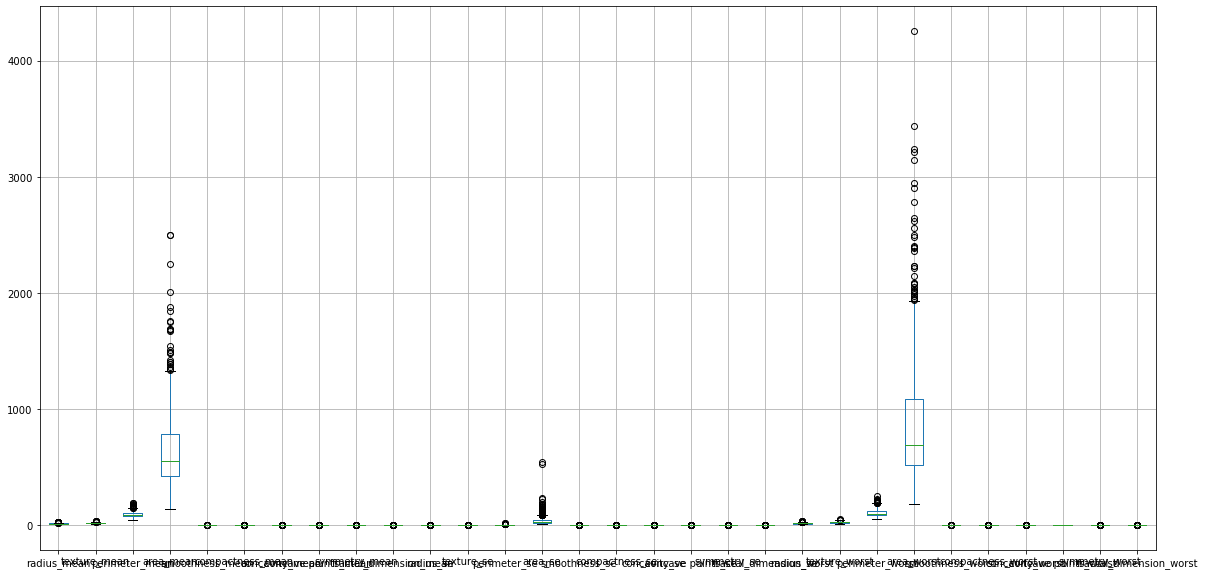

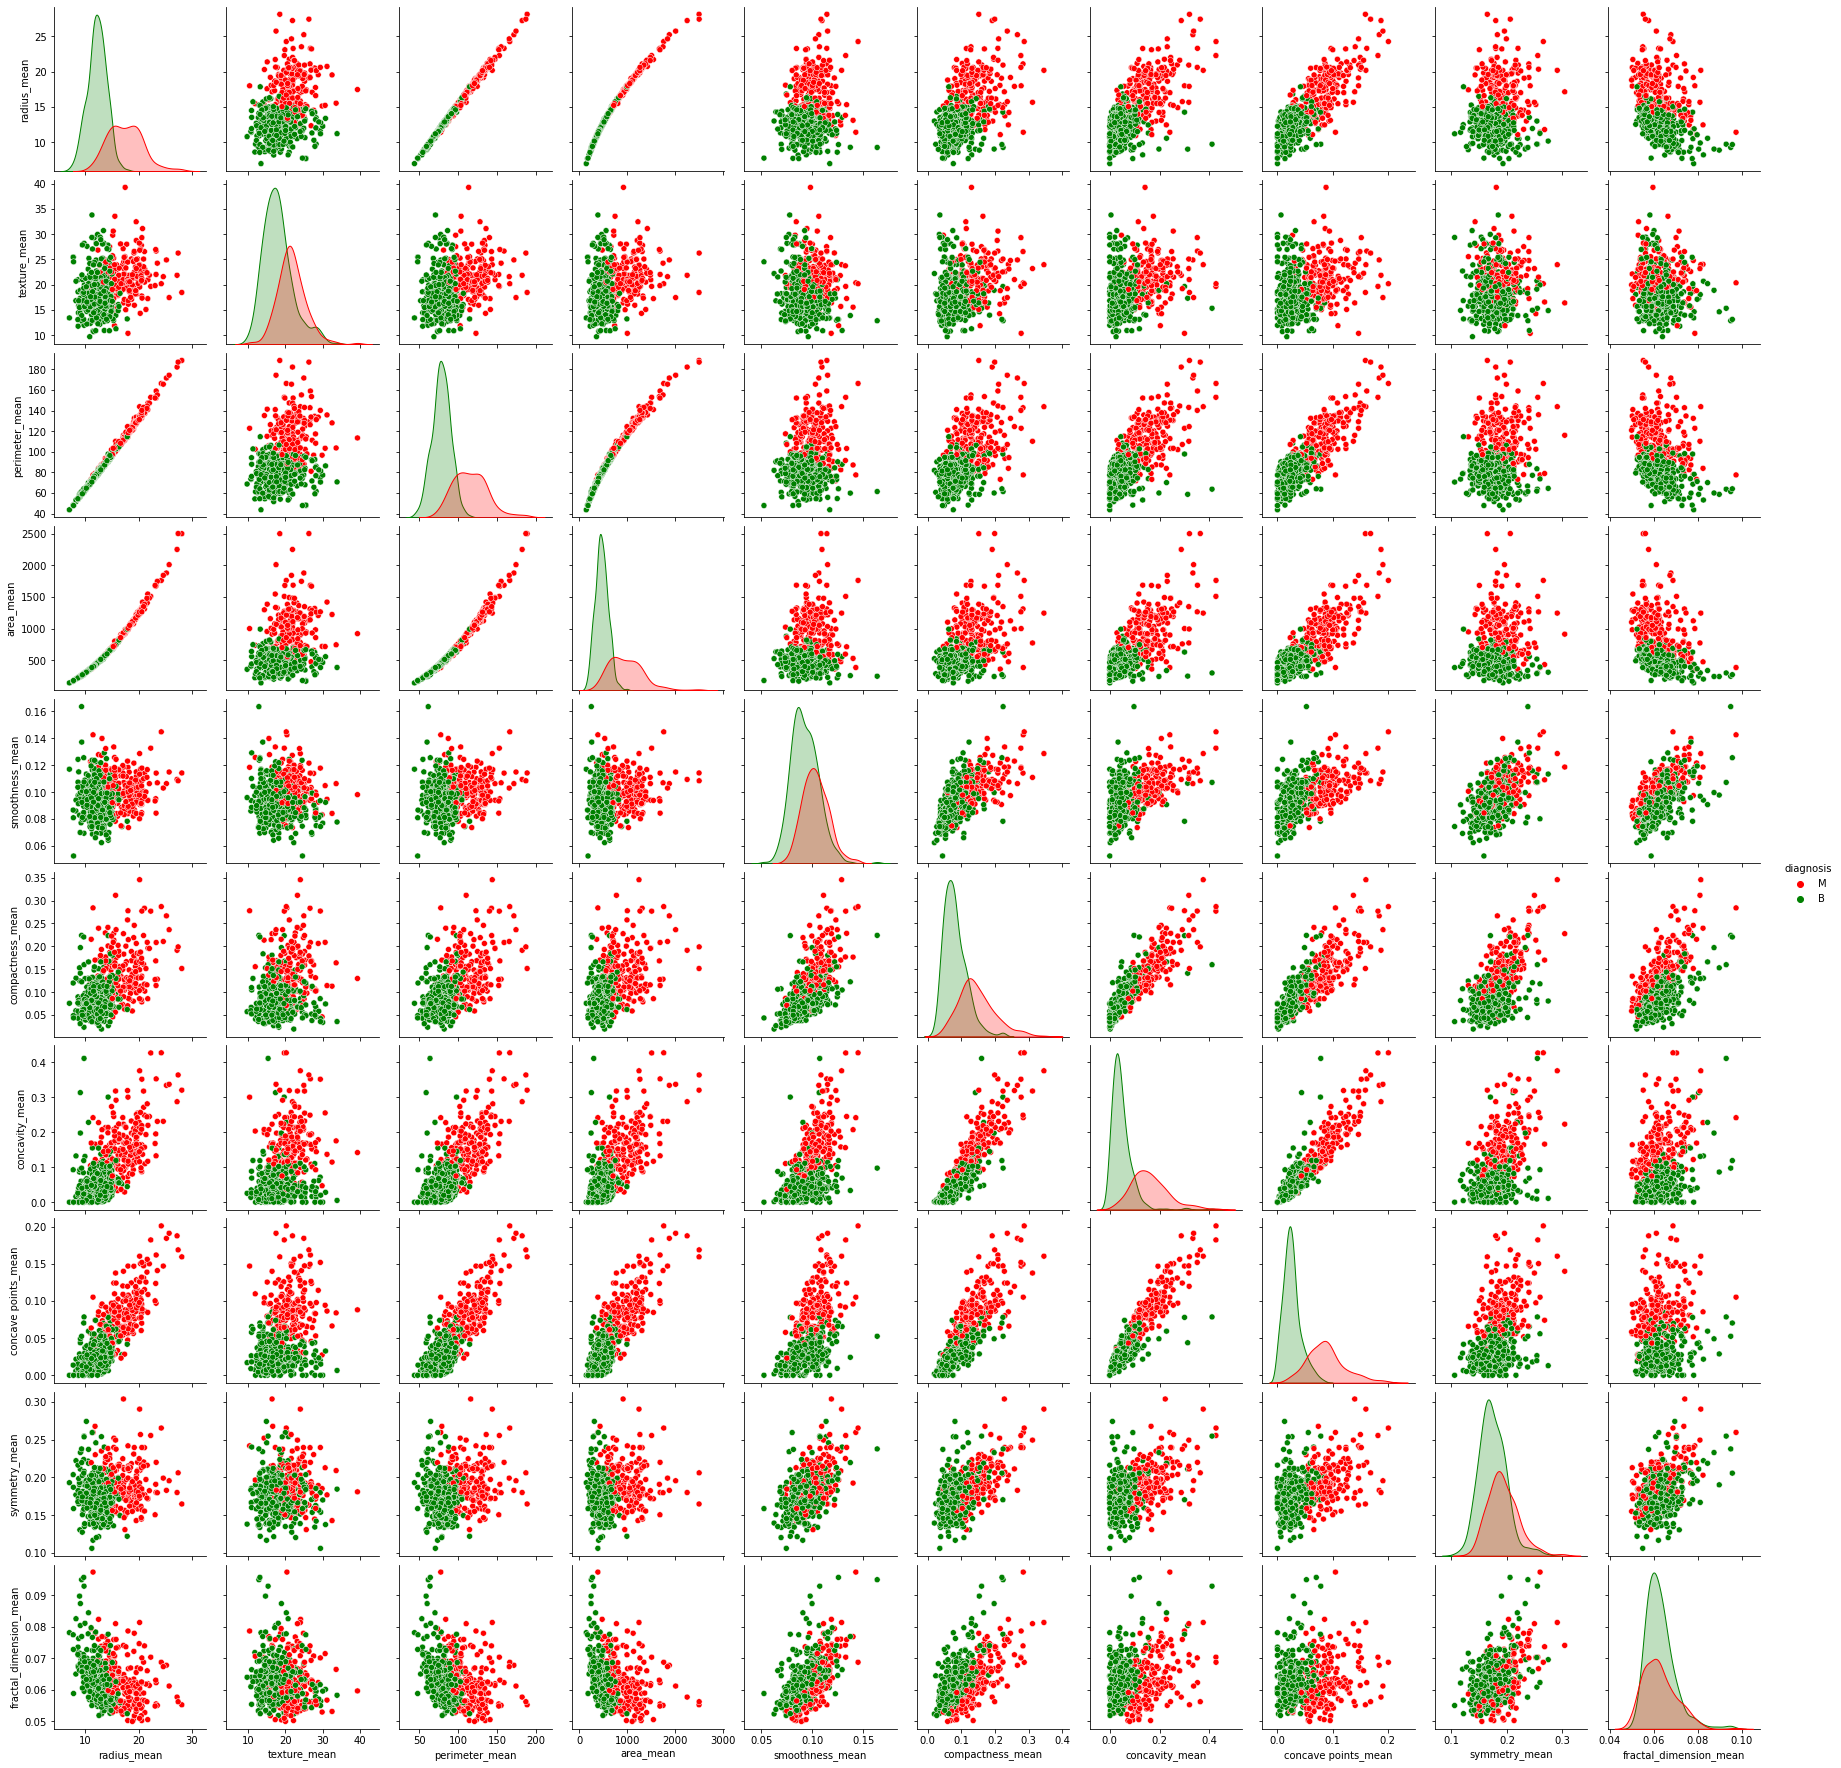

In [7]:
EDA(df)

In [8]:
# as we knows that there are total 569 instances in our dataframe and from histogram we can calculate malignnat and benign percentages so it will be near to Malignnat 37% and Benign 63% so it mean data is imbalance.
# Box Plots: The box plots depict the distribution of data across different groups or categories, showing the median, quartiles, and potential outliers. Scale differences between the box plots indicate varying magnitudes or ranges of data values. Outliers are data points that fall outside the whiskers of the box plot and are significantly different from the rest of the data

In [8]:
# Splitting data for ease in boolean,numerical and cateogorical columns
def Split_Columns(data):
    num_col=[]
    bool_col=[]
    cat_col=[]    
    for col in data.columns:
        if ((data[col].dtype=='float64') or (data[col].dtype=='int64')):
            num_col.append(col)
        elif (data[col].dtype=='bool'):
            bool_col.append(col)
        else:
            cat_col.append(col)    
    return num_col, bool_col, cat_col
num_col, bool_col, cat_col = Split_Columns(df)

In [9]:
# Correlation analysis
def Correlation_Analysis(df):
    df = df[num_col].corr()
    plt.figure(figsize = (15, 15))
    sns.heatmap(df[num_col].corr(), annot = True)
    return df

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

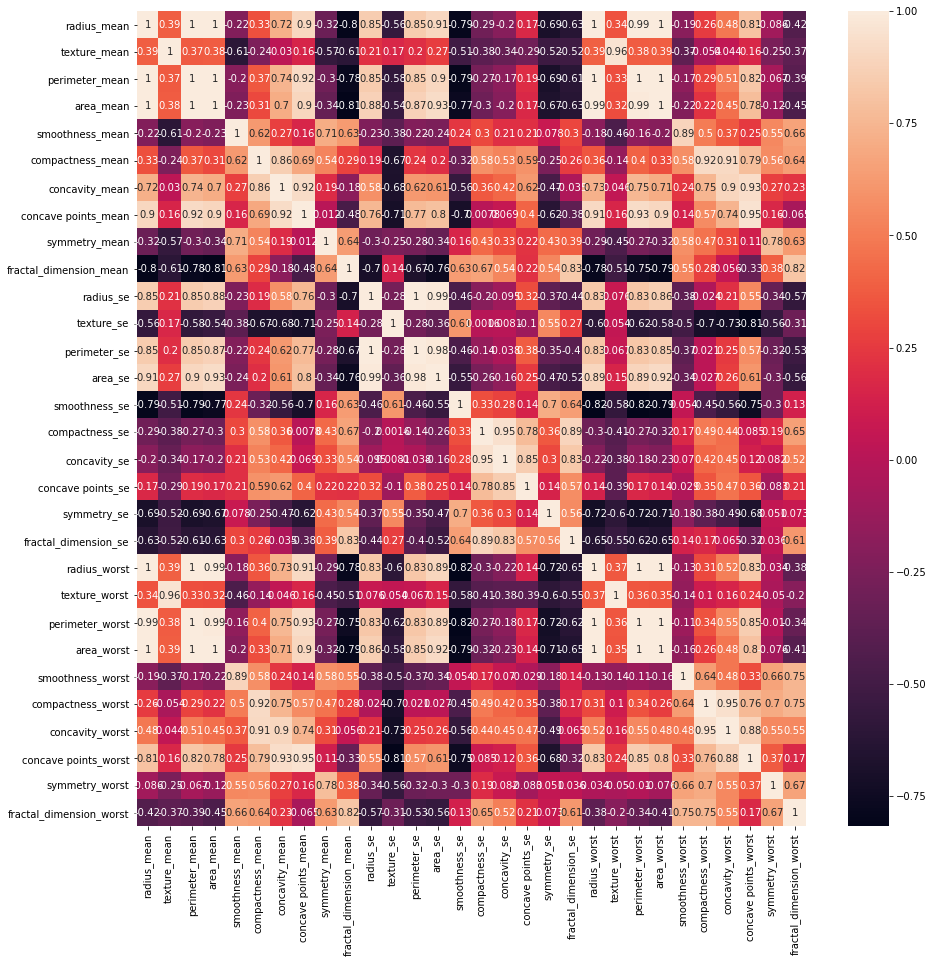

In [11]:
Correlation_Analysis(df)

In [12]:
# ------------Result of EDA
# Texture_mean and texture_worst are high correlared with value 0.96
# fraction_dimension_worst and fraction_dimension_mean are also correleted with 0.82 value.
# Radius, permiter and area are correlated as well
# some are normal correlated like texture features etc.  all those who belog to -1 or less are strong negative correlation
# Features related to symmetry are weak positive correlation as we can see in heatmap.

In [10]:
def detect_outliers(df):
    colors = px.colors.qualitative.Pastel  # Get a list of pastel colors for each box plot
    
    for i, column in enumerate(num_col):
        fig = go.Figure()
        fig.add_trace(go.Box(
            y=df[column],
            name=column,
            boxpoints='outliers',
            marker_color=colors[i % len(colors)]  # Use a different color for each box plot
        ))
        
        fig.update_layout(
            title='Boxplot for Outlier Detection',
            xaxis_title='Columns',
            yaxis_title='Values',
            showlegend=False,
            height=400,
            width=600,
            margin=dict(l=50, r=50, t=50, b=50),
            plot_bgcolor='white'
        )
        
        fig.show()

In [11]:
detect_outliers(df)

In [12]:
#calculating skewness values
def calculate_skewness(df):
    num_col = df.select_dtypes(include=['float64', 'int64']).columns
    
    skewness_dfs = []

    for column in num_col:
        skewness = df[column].skew()

        if skewness > 0:
            skewness_type = 'right-skewed'
        elif skewness < 0:
            skewness_type = 'left-skewed'
        else:
            skewness_type = 'approximately symmetric'

        skewness_df = pd.DataFrame({'Column': [column], 'Distribution': [skewness_type], 'Skewness Value': [skewness]})
        skewness_dfs.append(skewness_df)

    skewness_df = pd.concat(skewness_dfs, ignore_index=True)
    return skewness_df


In [13]:
calculate_skewness(df)

Column  Distribution  Skewness Value
0               radius_mean  right-skewed        0.942380
1              texture_mean  right-skewed        0.650450
2            perimeter_mean  right-skewed        0.990650
3                 area_mean  right-skewed        1.645732
4           smoothness_mean  right-skewed        0.456324
5          compactness_mean  right-skewed        1.190123
6            concavity_mean  right-skewed        1.401180
7       concave points_mean  right-skewed        1.171180
8             symmetry_mean  right-skewed        0.725609
9    fractal_dimension_mean  right-skewed        1.304489
10                radius_se  right-skewed        3.088612
11               texture_se  right-skewed        1.646444
12             perimeter_se  right-skewed        3.443615
13                  area_se  right-skewed        5.447186
14            smoothness_se  right-skewed        2.314450
15           compactness_se  right-skewed        1.902221
16             concavity_se  right-skewed        5.110463
17        concave points_se  right-skewed        1.444678
18              symmetry_se  right-skewed        2.195133
19     fractal_dimension_se  right-skewed        3.923969
20             radius_worst  right-skewed        1.103115
21            texture_worst  right-skewed        0.498321
22          perimeter_worst  right-skewed        1.128164
23               area_worst  right-skewed        1.859373
24         smoothness_worst  right-skewed        0.415426
25        compactness_worst  right-skewed        1.473555
26          concavity_worst  right-skewed        1.150237
27     concave points_worst  right-skewed        0.492616
28           symmetry_worst  right-skewed        1.433928
29  fractal_dimension_worst  right-skewed        1.662579

In [14]:
# as we can see from box plots f each features and skewness values so it's clear that mostly columns have positivr skewness values. There are not a single column that has negative skewness.

In [61]:
# There are some minor warnings so i wanna remove them
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
Label_Encoder= LabelEncoder()
df['diagnosis'] = Label_Encoder.fit_transform(df['diagnosis'])

In [62]:
# data splitting
def manual_data_splitting(df, target):
    y = df[target]
    X = df.drop(columns=[target])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    return X_train, X_test, y_train, y_test

In [63]:
X_train, X_test, y_train, y_test = manual_data_splitting(df,target)

In [64]:
def main_function(df):
    df.drop(columns=[target], inplace = True)
    preprocessor = ColumnTransformer(
        transformers=[
            ('df_scaled', StandardScaler(), df.columns)
        ], remainder='passthrough')
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ])
    return pipeline

In [65]:
myfucntion = main_function(df)

In [66]:
myfucntion.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('df_scaled', StandardScaler(),
                                                  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [67]:
y_pred = myfucntion.predict(X_test)

In [69]:
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       105
           1       0.98      0.89      0.94        66

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

AUC: 0.9422077922077923


In [23]:
# calculating accuracy,precision,recall etc
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)


In [24]:
# show classificaiton report as i calcualted abvoce
mycalculations = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1]
}

# Create DataFrame
metrics = pd.DataFrame(mycalculations)
metrics
# Results shows that model has good performance with high precision,positive predictions

Accuracy  Precision    Recall  F1-Score
0  0.953216   0.954844  0.953216  0.952752

In [25]:
# cross Validations
def cross_validation(myfucntion, X_train, y_train, cv_type):
    # Perform cross-validation
    scores = cross_val_score(myfucntion, X_train, y_train, cv=cv_type)
    return scores.mean()

In [26]:
# 1- KFold cross-validation object
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
k_fold_accuracy = cross_validation(myfucntion, X_train, y_train, k_fold)
print("K-Fold Cross-Validation Scores:", k_fold_accuracy)
print("Mean K-Fold CV Score:", k_fold_accuracy.mean())

K-Fold Cross-Validation Scores: 0.9672784810126582
Mean K-Fold CV Score: 0.9672784810126582


In [27]:
# Now see predictions on the testing data
y_pred = myfucntion.predict(X_test)
accuracy_k_fold = accuracy_score(y_test, y_pred)
precision_k_fold = precision_score(y_test, y_pred, average='weighted')
cm_k_fold = confusion_matrix(y_test, y_pred)
recall_k_fold = recall_score(y_test, y_pred, average='weighted')
f1_k_fold = f1_score(y_test, y_pred, average='weighted')


In [28]:
# Evaluate metrics with and without cross validation
# Define the data
mycalculation = {
    'Cross-Validation Type': ['Without CV', 'K-Fold'],
    'Cross-Validation Score': ['Without', k_fold_accuracy],
    'Accuracy': [accuracy, accuracy_k_fold],
    'Precision': [precision, precision_k_fold],
    'Recall': [recall, recall_k_fold],
    'F1-Score': [f1, f1_k_fold]
}
metrics = pd.DataFrame(mycalculation)
metrics

Cross-Validation Type Cross-Validation Score  Accuracy  Precision    Recall  \
0            Without CV                Without  0.953216   0.954844  0.953216   
1                K-Fold               0.967278  0.953216   0.954844  0.953216   

   F1-Score  
0  0.952752  
1  0.952752

In [29]:
# Now let's see the impact by applying another type of cross validation
# 2-Stratified Cross Validation

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_stratified_accuracy = cross_validation(myfucntion, X_train, y_train, skf)
print("Stratified Cross-Validation Scores:", cv_stratified_accuracy)
print("Mean Stratified CV Score:", cv_stratified_accuracy.mean())

Stratified Cross-Validation Scores: 0.9648101265822785
Mean Stratified CV Score: 0.9648101265822785


In [30]:
y_pred = myfucntion.predict(X_test)
accuracy_stratified = accuracy_score(y_test, y_pred)
precision_stratified = precision_score(y_test, y_pred, average='weighted')
recall_stratified = recall_score(y_test, y_pred, average='weighted')
f1_stratified = f1_score(y_test, y_pred, average='weighted')
cm_stratified = confusion_matrix(y_test, y_pred)


In [31]:
# 3- LeaveOneOut cross-validation 
loo = LeaveOneOut()
cv_loo_accuracy = cross_validation(myfucntion, X_train, y_train, loo)
print("Leave-One-Out Cross-Validation Scores:", cv_loo_accuracy)
print("Mean LOOCV Score:", cv_loo_accuracy.mean())

Leave-One-Out Cross-Validation Scores: 0.9698492462311558
Mean LOOCV Score: 0.9698492462311558


In [32]:
y_pred = myfucntion.predict(X_test)
accuracy_loo = accuracy_score(y_test, y_pred)
precision_loo = precision_score(y_test, y_pred, average='weighted')
recall_loo = recall_score(y_test, y_pred, average='weighted')
f1_loo = f1_score(y_test, y_pred, average='weighted')
cm_loo = confusion_matrix(y_test, y_pred)

In [33]:
# Now here i created a table where i show all 3 types results of cross validations
mydata = {
    'Cross-Validation Type': ['Without CV', 'K-Fold', 'Stratified', 'Leave-One-Out'],
    'Cross-Validation Score': ['Without Score', k_fold_accuracy, cv_stratified_accuracy, cv_loo_accuracy],
    'Accuracy': [accuracy, accuracy_k_fold, accuracy_stratified, accuracy_loo],
    'Precision': [precision, precision_k_fold, precision_stratified, precision_loo],
    'Recall': [recall, recall_k_fold, recall_stratified, recall_loo],
    'F1-Score': [f1, f1_k_fold, f1_stratified, f1_loo]
}
metrics = pd.DataFrame(mydata)
metrics

# so here we can see results that CV score are almost equal so we can say that model can perform well on unseen data or we can say that model is npt overfitting on training data. Now we can say confidently that the model is performing well and is likely to generalize well to new data

Cross-Validation Type Cross-Validation Score  Accuracy  Precision    Recall  \
0            Without CV          Without Score  0.953216   0.954844  0.953216   
1                K-Fold               0.967278  0.953216   0.954844  0.953216   
2            Stratified                0.96481  0.953216   0.954844  0.953216   
3         Leave-One-Out               0.969849  0.953216   0.954844  0.953216   

   F1-Score  
0  0.952752  
1  0.952752  
2  0.952752  
3  0.952752

In [70]:
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       105
           1       0.98      0.89      0.94        66

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

AUC: 0.9422077922077923


In [34]:
#---------------------------------------------Feature Selection Techniques
def Data():
    df = pd.read_csv('../Datasets/Classification.CancerMB.csv')
    X = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)
    y = df['diagnosis']
    return X, y

In [35]:
def preprocess(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = X_scaled - X_scaled.min()  # non-negative
    return X_scaled

In [36]:
# Evaluate the model using cross-validation
def evaluate_model(X, y, model):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores.mean()
def filter_methods(X, y):
    # Apply Chi-square Test
    chi2_selector = SelectKBest(chi2, k=10)
    X_chi2 = chi2_selector.fit_transform(X, y)
    
    # Apply Variance Threshold
    vt_selector = VarianceThreshold(threshold=0.1)
    X_vt = vt_selector.fit_transform(X)
    
    # Apply Covariance/Mutual Information
    mi_selector = SelectKBest(mutual_info_classif, k=10)
    X_mi = mi_selector.fit_transform(X, y)
    
    return X_chi2, X_vt, X_mi

In [37]:
def wrapper_methods(X, y):
    # Apply SelectKBest with chi2 scoring function
    selector = SelectKBest(score_func=chi2, k=10)
    X_selected = selector.fit_transform(X, y)
    return X_selected

In [54]:
def apply_knn_with_pca(X_train, X_test, y_train, y_test, n_components=5, n_neighbors=5):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn_with_pca = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_with_pca.fit(X_train_pca, y_train)

    y_pred_pca = knn_with_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)

    return accuracy_pca, y_pred_pca

accuracy, y_pred = apply_knn_with_pca(X_train, X_test, y_train, y_test)
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy * 100))

# Classification report
print("Classification Report with PCA:")
print(classification_report(y_test, y_pred))

Classification Accuracy with PCA: 92.40%
Classification Report with PCA:
              precision    recall  f1-score   support

           B       0.93      0.95      0.94       105
           M       0.92      0.88      0.90        66

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [39]:
# Preproses and model selection
X,y=Data()
X_scaled = preprocess(X)
knn = KNeighborsClassifier()

In [55]:
variances = df.var()
variances

radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst                 324167.385102
smoothness_worst

In [40]:
# Filter Methods
X_chi2, X_vt, X_mi = filter_methods(X_scaled, y)

# Wrapper Methods
X_fw = wrapper_methods(X_scaled, y)

# PCA Method
X_pca, explained_variance = pca_method(X_scaled)

In [56]:
# Evaluate KNN on original dataset
print("Original Dataset:", evaluate_model(X_scaled, y, knn))

# Chi-square
print("Chi-square Test:", evaluate_model(X_chi2, y, knn))

# Variance Threshold 
print("Variance Threshold:", evaluate_model(X_vt, y, knn))

#Covariance/Mutual Information 
print("Covariance/Mutual Information:", evaluate_model(X_mi, y, knn))

# Forward/Backward 
print("Forward/Backward Feature Selection:", evaluate_model(X_fw, y, knn))

Original Dataset: 0.9648501785437045
Chi-square Test: 0.9385188635305077
Variance Threshold: 0.9648501785437045
Covariance/Mutual Information: 0.9385343890700202
Forward/Backward Feature Selection: 0.9385188635305077


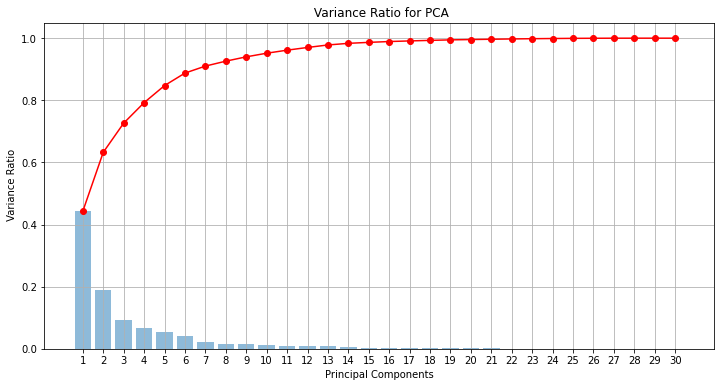

In [42]:
# PCA Analysis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cov_matrix = np.cov(X_scaled.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]

# Calculate the explained variance ratio
explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)

plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', color='r')
plt.xlabel('Principal Components')
plt.ylabel(' Variance Ratio')
plt.title(' Variance Ratio for PCA')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [71]:
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       105
           1       0.98      0.89      0.94        66

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

AUC: 0.9422077922077923


In [43]:
# From PCA graph, we can see clearly that there's some components have significant portion of the variance in this case we can see 80% ore more so we can seet that these componnets has more important features in our dataset.
#

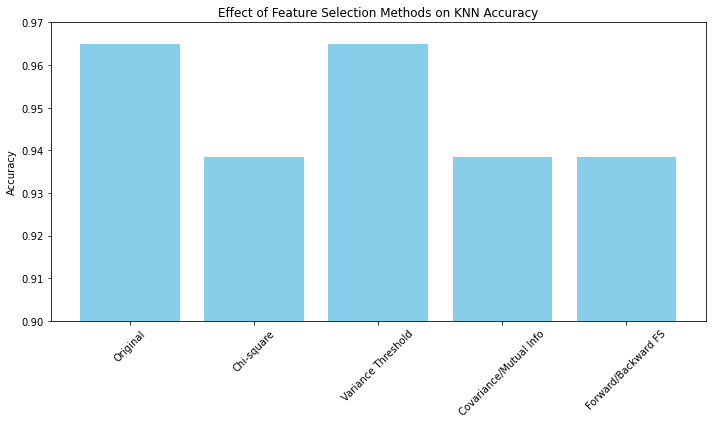

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores obtained from each feature selection method
methods = ['Original', 'Chi-square', 'Variance Threshold', 'Covariance/Mutual Info', 'Forward/Backward FS']
accuracy_scores = [0.9648501785437045, 0.9385188635305077, 0.9648501785437045, 0.9385343890700202, 0.9385188635305077]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(methods, accuracy_scores, color='skyblue')
plt.ylim(0.9, 0.97) 
plt.ylabel('Accuracy')
plt.title('Effect of Feature Selection Methods on KNN Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
"""
The original dataset achieved the highest accuracy at approximately 96.49%. Applying feature selection methods such as Chi-square Test and Covariance/Mutual Information slightly decreased the accuracy to around 93.85% that indicating that these methods may have removed some relevant features.
Variance Threshold had a negligible effect on accuracy, maintaining it at 96.49%. Forward/Backward Feature Selection also resulted in a similar accuracy of 93.85%.
PCA reducing dimensionality led to a slight decrease in accuracy to about 94.03%, suggesting some loss of information. 
So we can say that the original dataset and Variance Threshold method performed the best, while other methods showed minor decreases in accuracy.
"""

'\nThe original dataset achieved the highest accuracy at approximately 96.49%. Applying feature selection methods such as Chi-square Test and Covariance/Mutual Information slightly decreased the accuracy to around 93.85% that indicating that these methods may have removed some relevant features.\nVariance Threshold had a negligible effect on accuracy, maintaining it at 96.49%. Forward/Backward Feature Selection also resulted in a similar accuracy of 93.85%.\nPCA reducing dimensionality led to a slight decrease in accuracy to about 94.03%, suggesting some loss of information. \nSo we can say that the original dataset and Variance Threshold method performed the best, while other methods showed minor decreases in accuracy.\n'

In [46]:
# -------------------------------------------Combine Interpretation
""" As i have applied different approaches and i find some results:
-> Without Cross-Validation: KNN model achieved an accuracy of approximately 95.32% with almsot similar precision,recall and F1 score values. So it indicates that the model performed well on the dataset but might benefit from validation on unseen data.
-> With Cross-Validation: KNN model's performance improved slightly with cross-validation especially with K Fold and Leave-One-Out achieving higher accuracy scores like 96.73% and 96.98% respectively. So it shows that that cross validation helped generalize the model's performance better across different subsets of the dataset.
-> Feature Selection Techniques:
- Variance threshold has higher accuracy of approximately 96.49% mean that it is more effective in selecting relevant features
- I also apply Chi-square Test, Covariance/Mutual Information, Forward/Backward Feature Selection with accuracy around 93.85% mean they might not have captured the most important features in dataset.
- PCA has accuracy of around 92%, while not as high as the variance threshold but it found some important features as work for dimension reduction as i mentioend earlier compaonents and different variance.
So for this Cross Validation perform well as per my results.

"""

" As i have applied different approaches and i find some results:\n-> Without Cross-Validation: KNN model achieved an accuracy of approximately 95.32% with almsot similar precision,recall and F1 score values. So it indicates that the model performed well on the dataset but might benefit from validation on unseen data.\n-> With Cross-Validation: KNN model's performance improved slightly with cross-validation especially with K Fold and Leave-One-Out achieving higher accuracy scores like 96.73% and 96.98% respectively. So it shows that that cross validation helped generalize the model's performance better across different subsets of the dataset.\n-> Feature Selection Techniques:\n- Variance threshold has higher accuracy of approximately 96.49% mean that it is more effective in selecting relevant features\n- I also apply Chi-square Test, Covariance/Mutual Information, Forward/Backward Feature Selection with accuracy around 93.85% mean they might not have captured the most important feature